###### About Dataset

###### Context
* This is a dataset hosted by the Centers for Disease Control and Prevention. The organization has an open data platform found here and they update their information according the amount of data that is brought in. Explore CDC Data using Kaggle and all of the data sources available through the CDC organization page!

###### Update Frequency: This dataset is updated daily.
###### Acknowledgements
This dataset is maintained using Socrata's API and Kaggle's API. Socrata has assisted countless organizations with hosting their open data and has been an integral part of the process of bringing more data to the public.

* This dataset is distributed under the following licenses: Public Domain, Public Domain U.S. Government

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
data_ts = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\nchs-birth-rates-for-females-by-age-group-united-states.csv',parse_dates=['Year'])

In [83]:
# Set 'Year' as the index
data_ts = data_ts.set_index('Year')


In [60]:
age_rate = data.groupby('Age Group')['Birth Rate'].sum().sort_values(ascending = False).to_frame()
age_rate

,Birth Rate
Age Group,
20-24 years,11114.0
25-29 years,10238.0
30-34 years,6714.6
15-19 years,4529.4
35-39 years,3104.1
40-44 years,755.1
10-14 years,71.4
45-49 years,51.7


<Axes: xlabel='Age Group'>

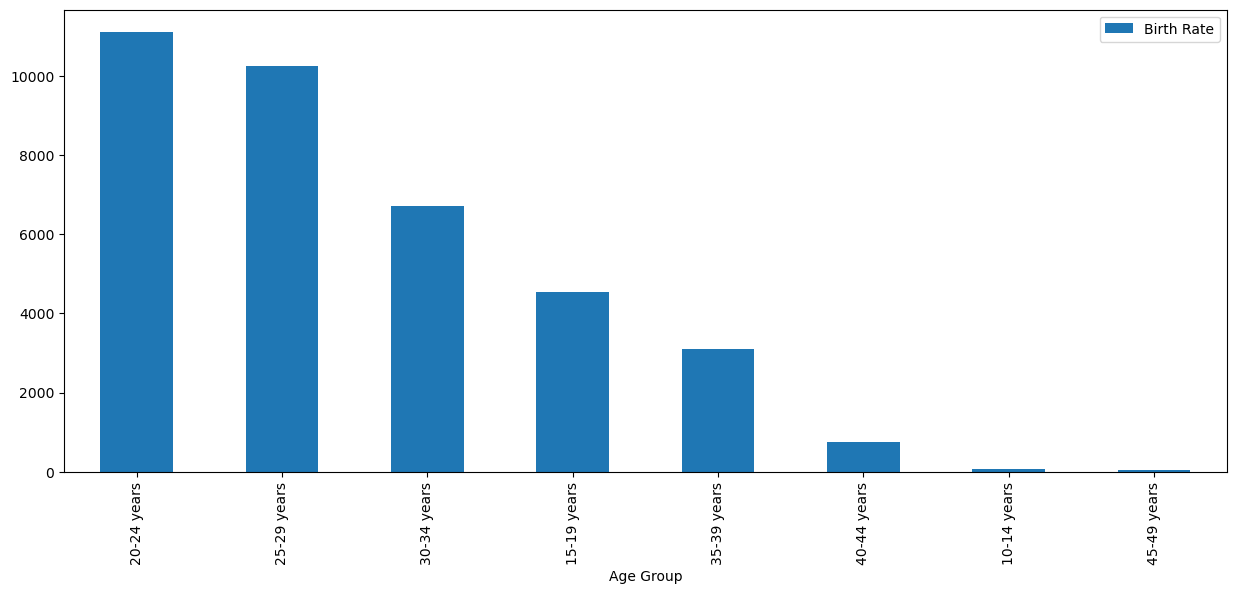

In [63]:
age_rate.plot(kind='bar',figsize=(15,6))

In [68]:
year_rate = data.groupby('Year')['Birth Rate'].sum().sort_values(ascending = False).head(10).to_frame()
year_rate

,Birth Rate
Year,
1957-01-01,753.5
1958-01-01,739.9
1956-01-01,737.9
1959-01-01,734.0
1960-01-01,730.7
1961-01-01,724.2
1955-01-01,715.7
1954-01-01,708.1
1962-01-01,692.2


In [69]:
data['Year'].nunique()

76

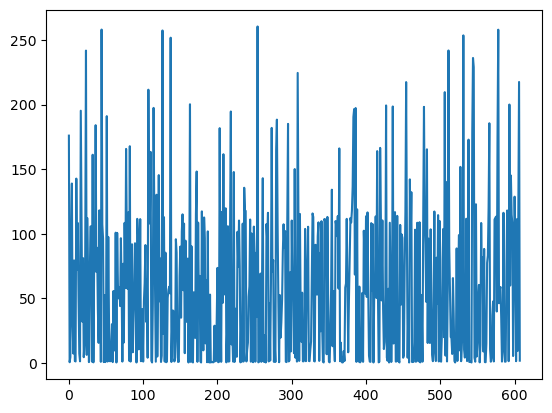

In [70]:
# plot the first 31 days using powerconsumption zone1
data['Birth Rate'].iloc[:744].plot();

The data is noisy

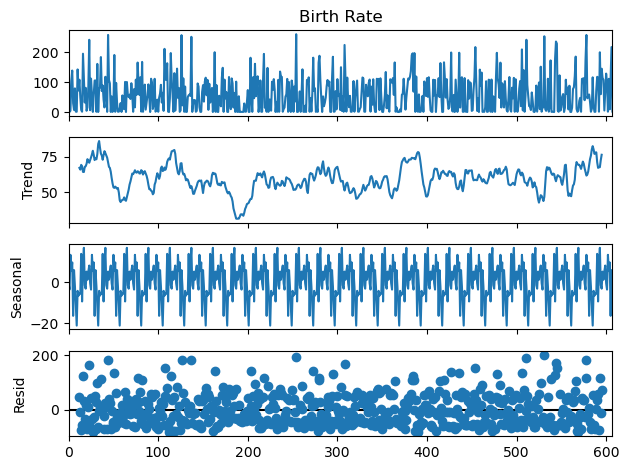

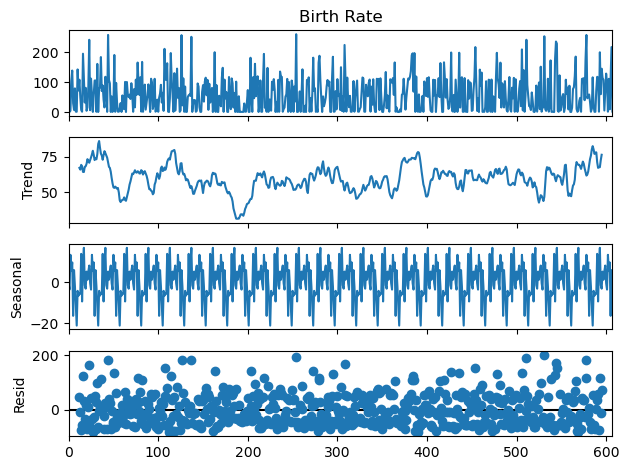

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(data['Birth Rate'].iloc[:744], period = (24))

results.plot()

In [76]:
lr = data.copy()

In [77]:
lr['Year'] = pd.to_datetime(lr['Year'], errors='coerce')  # Convert to datetime


In [78]:
lr.head()

,Year,Age Group,Birth Rate
0,1947-01-01,25-29 years,176.0
1,1997-01-01,45-49 years,0.4
2,1987-01-01,40-44 years,4.4
3,2015-01-01,25-29 years,104.3
4,1945-01-01,20-24 years,138.9


In [79]:
lr = lr['Birth Rate'].reset_index()
lr = lr.assign(
    trend = lr.index,
    hour = lr['Year'].dt.hour.astype('string'),
    
).set_index('Year')

lr.head()

KeyError: 'Year'